# Importing Libraries

In [1]:
"""This code simulates customers in Super Market"""
from datetime import datetime
from datetime import timedelta
from random import randrange
import pandas as pd
import numpy as np
import names

# load datasets

In [2]:
monday = pd.read_csv('./datasets/monday.csv', sep=';')
monday.head()

,timestamp,customer_no,location
0,2019-09-02 07:03:00,1,dairy
1,2019-09-02 07:03:00,2,dairy
2,2019-09-02 07:04:00,3,dairy
3,2019-09-02 07:04:00,4,dairy
4,2019-09-02 07:04:00,5,spices


# define Class and functions

In [3]:
#########################################################################################################################
def possible_states(initial_state):
    """This function generates n possible states for a customer in supermarket"""
    print(initial_state)
    current_state = [initial_state]
    n_state = 200
    for i in range(n_state):
        next_state = np.random.choice(list(transition_probabilities(monday).columns.values), p =list(transition_probabilities(monday).loc[initial_states()].values) )
        current_state.append(next_state)
        if next_state == 'checkout':
            return current_state
            break
###########################################################################################################################
def transition_probabilities(dataframe):
    """Generates trnasition porbablities for the supermarket data"""
    dataframe['after'] = dataframe.groupby(by = ['customer_no'])['location'].shift(-1)
    dataframe['after'].fillna('checkout', inplace=True)
    crosstab = pd.crosstab(dataframe['location'],dataframe['after'], normalize=0) 
    return crosstab

def initial_states():
    """this generates initial state of a customer in the supermarket"""
    #np.random.seed(250)
    state = ['dairy','drinks','spices','fruit']
    initial_state = np.random.choice(state)
    return initial_state

def random_time_generator(start_time):
    """This function generates time randomly within a given range"""
    current_time = start_time + timedelta(hours = randrange(13),minutes = randrange(60))
    return current_time

def rand_time_in_min():
    """This function generates time in seconds randomly"""
    return randrange(2,4)

def fake_names():
    """This function generates fake
    name from python names library"""
    customer_name = []
    for i in range(1500):
        customer_name.append(names.get_first_name())
    return customer_name

class Customer:
    """Its customer class which check if the customer is in the markert 
    or checkedoutout"""
    def __init__(self, dataframe, transition_probabilities):
        self.current_location = initial_states()
        self.dataframe = dataframe
        self.transition_probabilities = transition_probabilities
        
    def __repr__(self):
        """Return"""
        return f'The customer was at {self.initial_state}'

    def next_states(self):
        """Navigates the customer to the next state
        using a weighted random choice from the transition probabilities
        conditional on the current state."""
        self.current_location = np.random.choice(
            list(self.transition_probabilities(self.dataframe).columns.values), 
            p =list(self.transition_probabilities(self.dataframe)
            .loc[self.current_location].values) )
        #return self.nxt_state
    
    def is_active(self):
        """Returns a statement depending if the customer is in the 
        supermarket or checkedout"""
        if self.current_location != 'checkout':
            return True
        else:
            return False

# MC-Simulation

In [4]:
T_STEP = 0
sudo_market = pd.DataFrame()
for name in fake_names():
    current_customer  = Customer(monday,transition_probabilities)
    entry_time = random_time_generator(datetime(2022, 1, 29,7,00,00))
    customer_nav = {'customer_no': name,
                    'section': current_customer.current_location,
                    'time':entry_time}
    sudo_market = sudo_market.append(customer_nav, ignore_index = True)
    #print(f'{customer_name}  is at {current_customer.current_location} section')
    while True:
        current_customer.next_states()
        T_STEP += 1
        next_time = entry_time + timedelta(minutes=T_STEP)
        next_time = next_time.strftime('%Y-%m-%d %H:%M:%S')
        #print(next_time)
        if current_customer.is_active():
            #print(f'{customer_name}  is at {current_customer.current_location} section')
            customer_nav = {'customer_no': name,
                            'section': current_customer.current_location, 
                            'time':next_time}
            sudo_market = sudo_market.append(customer_nav, ignore_index = True)
        else:
            #print(f'{customer_name}  is at {current_customer.current_location} section')
            customer_nav = {'customer_no': name,
                            'section': current_customer.current_location,
                            'time':next_time}
            sudo_market = sudo_market.append(customer_nav, ignore_index = True)
            T_STEP = 0
            break

# Basic Visualization of Synthetic data generated from transition probablity

## Checking the dataframe

In [5]:
sudo_market.head(20)

,customer_no,section,time
0,Steven,dairy,2022-01-29 18:08:00
1,Steven,fruit,2022-01-29 18:09:00
2,Steven,dairy,2022-01-29 18:10:00
3,Steven,checkout,2022-01-29 18:11:00
4,Elva,dairy,2022-01-29 17:17:00
5,Elva,checkout,2022-01-29 17:18:00
6,Sarah,drinks,2022-01-29 12:28:00
7,Sarah,spices,2022-01-29 12:29:00
8,Sarah,dairy,2022-01-29 12:30:00
9,Sarah,checkout,2022-01-29 12:31:00


## .info on the df sudosupermarket

In [37]:
sudo_market.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5102 entries, 0 to 5101
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   customer_no  5102 non-null   object
 1   section      5102 non-null   object
 2   time         5102 non-null   object
dtypes: object(3)
memory usage: 119.7+ KB


## checking null values in terms of percentage

In [38]:
nan_percentage = sudo_market.isnull().sum()/sudo_market.shape[0]*100
nan_percentage

customer_no    0.0
section        0.0
time           0.0
dtype: float64

## grouping the data by 'section' and generating a count table with 'customer_no' in each section

In [39]:
section_gby =sudo_market.groupby(by=['section'])['customer_no'].count()
section_gby

section
checkout    1500
dairy        884
drinks       949
fruit        896
spices       873
Name: customer_no, dtype: int64

## coverting time object to datetime object and creating an hour feature

In [40]:
sudo_market['time'] = pd.to_datetime(sudo_market['time'])

sudo_market['hour'] = sudo_market['time'].dt.hour 

hourley_gby = sudo_market.groupby(by=['hour','section'])['customer_no'].count()  #we get multiindex output
hourley_gby

hour  section 
7     checkout    126
      dairy        56
      drinks       66
      fruit        77
      spices       64
                 ... 
19    spices       82
20    checkout      4
      dairy         1
      drinks        1
      fruit         3
Name: customer_no, Length: 69, dtype: int64

In [41]:
hourley_gby = hourley_gby.reset_index()    

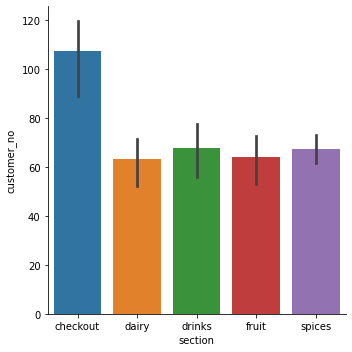

In [42]:
import seaborn as sns
plt = sns.catplot(data = hourley_gby, kind= 'bar', x  = 'section', y = 'customer_no')

<AxesSubplot:xlabel='hour', ylabel='customer_no'>

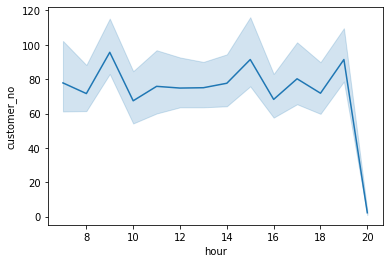

In [43]:
sns.lineplot(data = hourley_gby, x  = 'hour', y = 'customer_no' )

In [44]:
location_gby = hourley_gby.groupby(by = ['section','hour']).mean()
location_gby

customer_no
section  hour             
checkout 7           126.0
         8           103.0
         9           134.0
         10          102.0
         11          118.0
...                    ...
spices   15           77.0
         16           62.0
         17           69.0
         18           59.0
         19           82.0

[69 rows x 1 columns]

In [45]:
location_gby = location_gby.reset_index()
location_gby

,section,hour,customer_no
0,checkout,7,126.0
1,checkout,8,103.0
2,checkout,9,134.0
3,checkout,10,102.0
4,checkout,11,118.0
...,...,...,...
64,spices,15,77.0
65,spices,16,62.0
66,spices,17,69.0
67,spices,18,59.0


In [46]:
location_group = location_gby.copy()

In [47]:
location_group

,section,hour,customer_no
0,checkout,7,126.0
1,checkout,8,103.0
2,checkout,9,134.0
3,checkout,10,102.0
4,checkout,11,118.0
...,...,...,...
64,spices,15,77.0
65,spices,16,62.0
66,spices,17,69.0
67,spices,18,59.0


C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Asus\anaconda3\l

[(0.0, 200.0)]

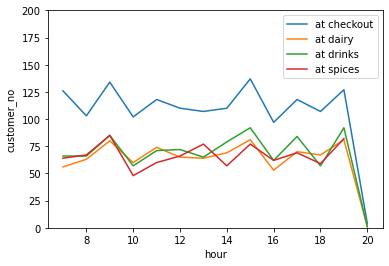

In [48]:
labels = ['checkout','dairy','drinks','fruits','spices']

for lab in labels:
    loc = location_gby[location_gby['section'] =='%s'% lab]
    plot = sns.lineplot(loc['hour'],loc['customer_no'], label='at %s' % lab)
    
plot.set(ylim=(0, 200))